In [46]:
import torch
from torch import nn
import numpy as np

In [6]:
mlp = nn.Sequential(
      nn.Linear(hidden_dim, 32),
      nn.Dropout(0.5),
      nn.ReLU(),
      nn.BatchNorm1d(32),
      nn.Linear(32, 1)
)

In [2]:
batch_size = 5000
max_len = 50
hidden_dim = 128
o2 = torch.randn(batch_size, max_len, hidden_dim)
o2.shape

torch.Size([5000, 50, 128])

In [18]:
o2_resize = o2.resize(batch_size*max_len,hidden_dim)
o2_resize.shape

torch.Size([250000, 128])

In [20]:
o2_resize = torch.flatten(o2,start_dim=0,end_dim=1)
o2_resize.shape

torch.Size([250000, 128])

In [19]:
mlp(o2_resize).shape

torch.Size([250000, 1])

In [13]:
mlp(o2).shape

RuntimeError: running_mean should contain 50 elements not 32

In [28]:
o2.shape[[0]]

TypeError: tuple indices must be integers or slices, not list

In [2]:
import pandas as pd
from torch.nn.utils.rnn import pad_sequence
import torch

In [3]:
data_dir = '/novo/projects/departments/cdd/molecular_ai/mlbp/data/static_input_data'
path = f'{data_dir}/sbxw_fibrillation_peptide_waltzdb-train-val_amypro27-test_randpadded10x.csv'
print(path)
df = pd.read_csv(path,index_col=0)
df

/novo/projects/departments/cdd/molecular_ai/mlbp/data/static_input_data/sbxw_fibrillation_peptide_waltzdb-train-val_amypro27-test_randpadded10x.csv


,sequence,value_bool,data_split,dataset,mask,core_sequence,len,res_value_bool,name
0,THSTVPIEG,0,val,waltzdb,001111110,STVPIE,9,000000000,NaN
1,TDSTSTVPIEQDR,0,val,waltzdb,0000111111000,STVPIE,13,0000000000000,NaN
2,CDGGQRCSTVPIEQ,0,val,waltzdb,00000001111110,STVPIE,14,00000000000000,NaN
3,NGPRSTVPIEHCETNKHEG,0,val,waltzdb,0000111111000000000,STVPIE,19,0000000000000000000,NaN
4,DNDKKRSTVPIEHC,0,val,waltzdb,00000011111100,STVPIE,14,00000000000000,NaN
...,...,...,...,...,...,...,...,...,...
22,MGQEQDTPWILSTGHISTQKRQDGQQTPKLEHRNSTRLMGHCQKTM...,1,test,amypro27,not_available,NaN,87,0000000000000000000000000000000000000000000000...,PB1_F2csv__AP00125
23,QAKEPCVESLVSQYFQTVTDYGKDLMEKVKSPELQAEAKSYFEKSK...,1,test,amypro27,not_available,NaN,98,0000000000000000000000000000000000000000000000...,ApoAII__AP00127
24,FGIPCCPVHLKRLLIVVVVVVLIVVVIVGALLMGL,1,test,amypro27,not_available,NaN,35,00000000111111111111111111111111110,Lung_Surfactant__AP00130
25,IGDDSGPVSANGNGASQYFGNSMTTGNMSPQMALIQGSFNKPCIAV...,1,test,amypro27,not_available,NaN,105,0000000000111111111111111111111111111111110000...,RdIB_protein__AP00133


In [5]:
df['sequence_length_aa'] = df['sequence'].apply(len)
df['res_aa'] = df['sequence'].apply(list)
df['res_aa_idx'] = df['sequence'].apply(lambda x: range(len(x)))
df['res_value_bool'] = df['res_value_bool'].apply(list)
explode_df = df.explode(['res_aa','res_aa_idx','res_value_bool'])
assert len(df.explode(['res_aa','res_aa_idx','res_value_bool'])) == df['sequence_length_aa'].sum()

In [6]:
batch = [[row['sequence'],row['res_value_bool']] for i,row in df.head(100).iterrows()]
batch

[['THSTVPIEG', ['0', '0', '0', '0', '0', '0', '0', '0', '0']],
 ['TDSTSTVPIEQDR',
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
 ['CDGGQRCSTVPIEQ',
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
 ['NGPRSTVPIEHCETNKHEG',
  ['0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0']],
 ['DNDKKRSTVPIEHC',
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
 ['DNDQHSRKSTVPIERGTDCSGHD',
  ['0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0']],
 ['NHPSSTVPIEKE',
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
 ['GSHTSSSTVPIEDRSEQT',
  ['0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0']],
 ['PNHSSTVP

In [13]:
import numpy as np

In [26]:
df['res_value_bool']

0                           [0, 0, 0, 0, 0, 0, 0, 0, 0]
1               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                            ...                        
22    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
23    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
24    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...
25    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...
26    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: res_value_bool, Length: 14017, dtype: object

In [22]:
labels = np.array([int(x) for seq in df['res_value_bool'] for x in seq],dtype=float) #[B * L]
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [25]:
df['sequence_length_aa'].sum()

241306

In [23]:
labels.shape

(241306,)

In [24]:
labels.max()

1.0

In [62]:
labels = torch.tensor([int(x) for item in batch for x in item[1]],dtype=torch.float).reshape(-1, 1) if len(batch[0]) == 2 else None # [B * L, 1]
labels.shape

torch.Size([1708, 1])

In [64]:
df.head(100)['len'].max()

26

In [65]:
len(batch)*df.head(100)['len'].max()

2600

In [89]:
residue_labels = [torch.tensor([int(x) for x in item[1]],dtype=torch.float) for item in batch]
residue_labels_padded = pad_sequence(residue_labels, batch_first=True)
residue_labels_flattened = torch.flatten(residue_labels_padded,start_dim=0,end_dim=1)
residue_labels_flattened = residue_labels_flattened.unsqueeze(dim=-1)
residue_labels_flattened.shape

torch.Size([2600, 1])

In [88]:
residue_labels_flattened.unsqueeze(dim=-1).shape

torch.Size([2600, 1])

In [36]:
mask = torch.rand((100,48)) > 0.5
mask

tensor([[ True, False,  True,  ..., False, False,  True],
        [ True, False, False,  ..., False,  True,  True],
        [ True,  True, False,  ..., False, False, False],
        ...,
        [ True, False,  True,  ..., False, False,  True],
        [False,  True,  True,  ..., False,  True, False],
        [ True, False, False,  ...,  True,  True, False]])

In [47]:
pred = torch.rand(100,48,1)
flattened_pred = torch.flatten(pred,start_dim=0,end_dim=1)
print(pred.shape)
print(flattened_pred.shape)

torch.Size([100, 48, 1])
torch.Size([4800, 1])


In [48]:
flattened_mask = torch.flatten(mask).unsqueeze(-1)
flattened_mask.shape

torch.Size([4800, 1])

In [49]:
# select residues
flattened_mask = torch.flatten(mask).unsqueeze(-1)
print(flattened_mask.shape)
torch.masked_select(flattened_pred,flattened_mask).shape

torch.Size([2442])

In [80]:
torch.ones(10,10).to(torch.bool).shape

torch.Size([10, 10])

In [64]:
mask

tensor([ True, False, False,  True, False, False, False,  True, False,  True,
        False,  True, False, False,  True, False, False,  True, False,  True,
        False, False, False, False,  True, False,  True, False, False,  True,
         True, False, False,  True, False,  True,  True, False, False, False,
        False,  True, False,  True, False,  True,  True, False])

In [115]:
# return as sequences
unflattened_pred = torch.unflatten(flattened_pred.squeeze(), dim=0, sizes=(100, 48))
print(unflattened_pred.shape)
print(mask.shape)
seq_list = []
sum_of_lengths = 0
for i,seq in enumerate(unflattened_pred):
    seq_pred = torch.masked_select(seq,mask[i]).cpu().numpy().squeeze()
    sum_of_lengths+=len(seq_pred)
    # print(len(seq_pred))
    seq_list.append(seq_pred)
print(len(seq_list))
print(sum_of_lengths)

torch.Size([100, 48])
torch.Size([100, 48])
100
2442


In [73]:
np.concatenate(seq_list).shape

(2442,)

In [74]:
type(seq_list[0])

numpy.ndarray

In [81]:
torch.tensor(1.0)

tensor(1.)

In [86]:
pred_prob = torch.randn(100).numpy()
pred_prob.shape

(100,)

In [83]:
cutoffs = np.linspace(0,1,101)
cutoffs.shape

(101,)

In [99]:
thresholded_probabilities = (pred_prob > np.expand_dims(cutoffs,axis=-1))

In [100]:
import pandas as pd

In [102]:
mcc_df = pd.DataFrame({'cutoffs':cutoffs,'predictions':[x for x in thresholded_probabilities]})
mcc_df

,cutoffs,predictions
0,0.00,"[False, False, True, True, False, False, True,..."
1,0.01,"[False, False, True, True, False, False, True,..."
2,0.02,"[False, False, True, True, False, False, True,..."
3,0.03,"[False, False, True, True, False, False, True,..."
4,0.04,"[False, False, True, True, False, False, True,..."
...,...,...
96,0.96,"[False, False, False, False, False, False, Fal..."
97,0.97,"[False, False, False, False, False, False, Fal..."
98,0.98,"[False, False, False, False, False, False, Fal..."
99,0.99,"[False, False, False, False, False, False, Fal..."


In [1]:
import numpy as np
import torch
import seaborn as sns

In [2]:
test = torch.rand(5)
test[-2:] = torch.nan
print(test)
np_test = test.numpy()
print(np_test)
print(np.nanmean(np_test))

tensor([0.2223, 0.2171, 0.7423,    nan,    nan])
[0.22226512 0.21705419 0.7422512         nan        nan]
0.39385685


In [3]:
x = np.random.rand(5,4)
mask = np.array([
    [1,1,0,0,],
    [1,1,1,1,],
    [1,1,1,0,],
    [1,1,1,0,],
    [1,0,0,0,],
],dtype=bool)
print(x.shape,mask.shape)

(5, 4) (5, 4)


In [4]:
print(x)

[[0.42523732 0.23586482 0.30182234 0.50274904]
 [0.86606244 0.41148464 0.22455327 0.65405707]
 [0.5297749  0.54731196 0.59306617 0.71985456]
 [0.99279794 0.65894962 0.82946141 0.60041427]
 [0.31173326 0.73976519 0.72446064 0.92158523]]


In [5]:
print(mask)

[[ True  True False False]
 [ True  True  True  True]
 [ True  True  True False]
 [ True  True  True False]
 [ True False False False]]


In [6]:
x[mask]

array([0.42523732, 0.23586482, 0.86606244, 0.41148464, 0.22455327,
       0.65405707, 0.5297749 , 0.54731196, 0.59306617, 0.99279794,
       0.65894962, 0.82946141, 0.31173326])

In [7]:
cutoffs = np.linspace(0,1,101)
thresholded_probabilities = x[mask] > np.expand_dims(cutoffs,axis=-1)
thresholded_probabilities

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

<Axes: >

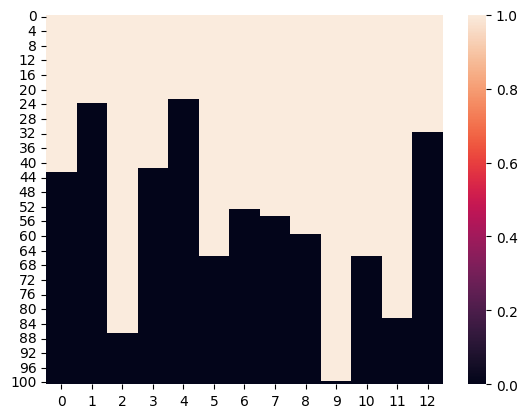

In [8]:
sns.heatmap(thresholded_probabilities)

In [9]:
x = np.random.rand(5,4)
mask = np.array([
    [1,1,0,0,],
    [1,1,1,1,],
    [1,1,1,0,],
    [1,1,1,0,],
    [1,0,0,0,],
],dtype=bool)
print(x.shape,mask.shape)

(5, 4) (5, 4)


In [10]:
x_masked = np.ma.masked_array(x,~mask)
x_masked

masked_array(
  data=[[0.2224478974535946, 0.09705991405439507, --, --],
        [0.10292874850032396, 0.8498350469274466, 0.7568619008772993,
         0.19177145177699195],
        [0.4949577263675087, 0.43186988888972455, 0.7064059667764377, --],
        [0.7486361315710643, 0.6623009397904094, 0.5387280331751305, --],
        [0.2796786107853021, --, --, --]],
  mask=[[False, False,  True,  True],
        [False, False, False, False],
        [False, False, False,  True],
        [False, False, False,  True],
        [False,  True,  True,  True]],
  fill_value=1e+20)

In [11]:
x_masked.mean(axis=1)

masked_array(data=[0.15975390575399484, 0.4753492870205155,
                   0.5444111940112236, 0.6498883681788681,
                   0.2796786107853021],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [12]:
x_masked.compressed()

array([0.2224479 , 0.09705991, 0.10292875, 0.84983505, 0.7568619 ,
       0.19177145, 0.49495773, 0.43186989, 0.70640597, 0.74863613,
       0.66230094, 0.53872803, 0.27967861])

In [14]:
x_masked > 0.1

masked_array(
  data=[[True, False, --, --],
        [True, True, True, True],
        [True, True, True, --],
        [True, True, True, --],
        [True, --, --, --]],
  mask=[[False, False,  True,  True],
        [False, False, False, False],
        [False, False, False,  True],
        [False, False, False,  True],
        [False,  True,  True,  True]],
  fill_value=True)

In [16]:
int(-1)

-1

In [18]:
import torch
import torch.nn as nn

In [33]:
mlp = nn.Sequential(
                nn.Linear(256, 32),
                nn.Dropout(0.25),
                nn.ReLU(),
                nn.BatchNorm1d(32),
                nn.Linear(32, 1)
            )
mlp

Sequential(
  (0): Linear(in_features=256, out_features=32, bias=True)
  (1): Dropout(p=0.25, inplace=False)
  (2): ReLU()
  (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [34]:
test = torch.randn(100,10,256)
test.shape

torch.Size([100, 10, 256])

In [37]:
test_flatten = torch.flatten(test,start_dim=0,end_dim=1)
test_flatten.shape

torch.Size([1000, 256])

In [39]:
mlp(test_flatten).shape

torch.Size([1000, 1])

In [41]:
np.ma.masked_array(np.array([10,10]))

masked_array(data=[10, 10],
             mask=False,
       fill_value=999999)

In [44]:
mask = ~np.array([
    [1,1,0,0,],
    [1,1,1,1,],
    [1,1,1,0,],
    [1,1,1,0,],
    [1,0,0,0,],
],dtype=bool)
mask

array([[False, False,  True,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False,  True,  True,  True]])

In [94]:
from dataclasses import dataclass
@dataclass
class Prediction:
    """Dataclass for organizing the output and intermediate values from the model
    """
    sequences: np.array
    sequence_embeddings: np.array
    additional_features_untransformed: pd.DataFrame
    features: np.array
    features_concat_dimred_concat: np.array
    predictions: np.array
    data_split: str
    labels: np.array = None # Labels only available during training
    group_names: list[str] = None
    predictions_probability: np.array = None # Not all methods provide a probability
    residue_level_prediction: bool = False

In [36]:
labels = np.array(['0101','11101'])
labels

array(['0101', '11101'], dtype='<U5')

In [43]:
labels2 = [('a',torch.tensor([float(y) for y in list(x)],dtype=float)) for x in labels]
labels2

[('a', tensor([0., 1., 0., 1.], dtype=torch.float64)),
 ('a', tensor([1., 1., 1., 0., 1.], dtype=torch.float64))]

In [47]:
labels

array(['0101', '11101'], dtype='<U5')

In [52]:
labels2 = [np.array([float(y) for y in list(x)],dtype=float) for x in labels]
labels2

[array([0., 1., 0., 1.]), array([1., 1., 1., 0., 1.])]

In [53]:
np.concatenate(labels2)

array([0., 1., 0., 1., 1., 1., 1., 0., 1.])